<a href="https://colab.research.google.com/github/vscmarcus/ProjetokNNt3/blob/main/Unidade9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementação e Análise do Algoritmo k-Nearest Neighbors (kNN)
### Projeto de Ciência de Dados com Influencers do Instagram


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import re

url = '/content/top_insta_influencers_data.csv'
df = pd.read_csv(url)

In [2]:
# Função para converter strings com 'k', 'm', 'b' em valores numéricos
def parse_numeric(text):
    if isinstance(text, str):
        text = text.lower().replace(',', '').strip()
        if 'k' in text:
            return float(text.replace('k', '')) * 1_000
        elif 'm' in text:
            return float(text.replace('m', '')) * 1_000_000
        elif 'b' in text:
            return float(text.replace('b', '')) * 1_000_000_000
        elif text.endswith('%'):
            return float(text.rstrip('%')) / 100
        try:
            return float(text)
        except ValueError:
            return np.nan
    return text

# Aplicar a conversão às colunas relevantes
columns_to_parse = ['posts', 'followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes']
for col in columns_to_parse:
    df[col] = df[col].apply(parse_numeric)

In [3]:
# Mapeamento de países para códigos de continentes
continent_codes = {

    # South America
    'Brazil': 1, 'Argentina': 2, 'Uruguay': 3, 'Colombia': 4,

    #North America
    'United States': 10, 'Canada': 11, 'Puerto Rico': 12, 'Anguilla': 13, 'Mexico': 14,

    #Asia
    'India': 20, 'Turkey': 21, 'Indonesia': 22, 'United Arab Emirates': 23, 'Russia': 24,

    #Africa
    'CÃ\´te d\'Ivoire': 30,

    #Oceania
    'Australia': 40,

    #Europe
    'Netherlands': 50,
    'United Kingdom': 51,
    'France': 52,
    'Italy': 53,
    'Switzerland': 54,
    'Sweden': 55,
    'British Virgin Islands': 56,
    'Czech Republic': 57,
    'Germany': 58
}
df['continent_code'] = df['country'].map(continent_codes).fillna(0)  # 0 para países não mapeados

# Seleção de features e target
feature_columns = ['followers', 'avg_likes', '60_day_eng_rate', 'total_likes', 'continent_code']
target_column = 'influence_score'

# Filtrar dados para remover continentes desconhecidos
cleaned_data = df[df['continent_code'] != 0]

# Separar features e target
X = cleaned_data[feature_columns]
y = cleaned_data[target_column]

# Normalizar as features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.25, random_state=101)


In [4]:
# Treinamento inicial do modelo kNN
knn_model = KNeighborsRegressor(n_neighbors=3, metric='minkowski')
knn_model.fit(X_train, y_train)

# Realizar previsões
y_predictions = knn_model.predict(X_test)

# Calcular métricas de erro
mae_value = mean_absolute_error(y_test, y_predictions)
mse_value = mean_squared_error(y_test, y_predictions)
rmse_value = np.sqrt(mse_value)

print(f"MAE: {mae_value}")
print(f"MSE: {mse_value}")
print(f"RMSE: {rmse_value}")

# Otimizar parâmetros com GridSearchCV
parameter_grid = {
    'n_neighbors': [2, 4, 6, 8, 10],
    'metric': ['minkowski', 'manhattan']
}
grid_search_model = GridSearchCV(KNeighborsRegressor(), parameter_grid, cv=4, scoring='neg_mean_squared_error')
grid_search_model.fit(X_train, y_train)

# Melhor modelo otimizado
optimized_knn = grid_search_model.best_estimator_
optimal_params = grid_search_model.best_params_
print("Parâmetros Otimizados:", optimal_params)

# Avaliação do modelo otimizado
optimized_predictions = optimized_knn.predict(X_test)
mae_optimized = mean_absolute_error(y_test, optimized_predictions)
mse_optimized = mean_squared_error(y_test, optimized_predictions)
rmse_optimized = np.sqrt(mse_optimized)

print(f"MAE Otimizado: {mae_optimized}")
print(f"MSE: {mse_optimized}")
print(f"RMSE: {rmse_optimized}")

MAE: 5.151515151515151
MSE: 54.09427609427611
RMSE: 7.3548811067396676
Parâmetros Otimizados: {'metric': 'minkowski', 'n_neighbors': 6}
MAE Otimizado: 4.96969696969697
MSE: 52.98148148148148
RMSE: 7.278837921088879


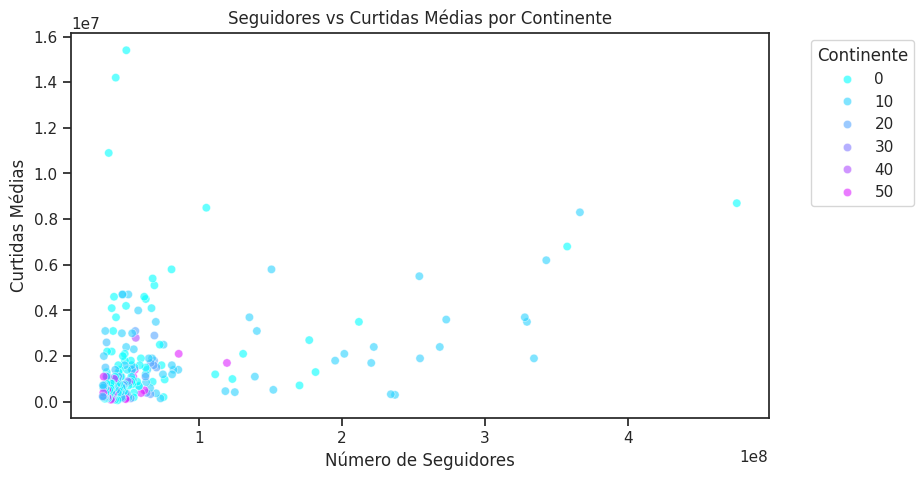

<ipython-input-6-5e8532dfae82>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rank', y='influence_score', data=df.sort_values('rank'), palette='icefire')


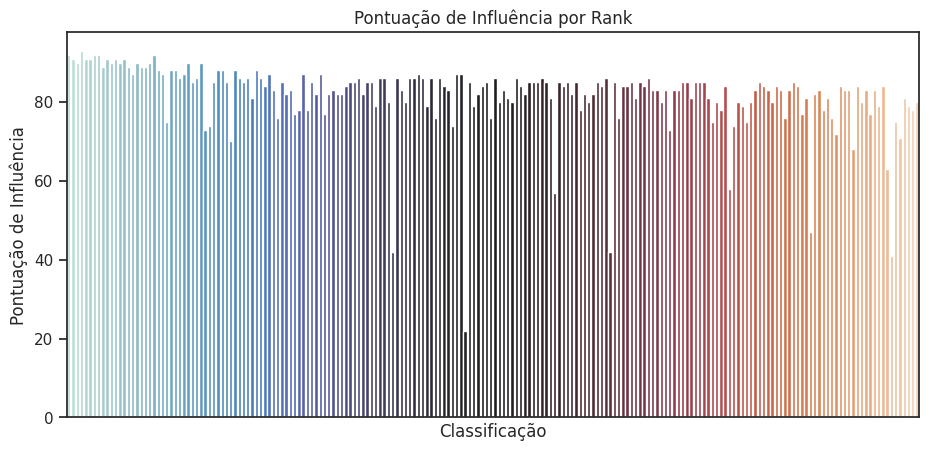

<ipython-input-6-5e8532dfae82>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=continent_counts.index, y=continent_counts.values, palette='viridis')


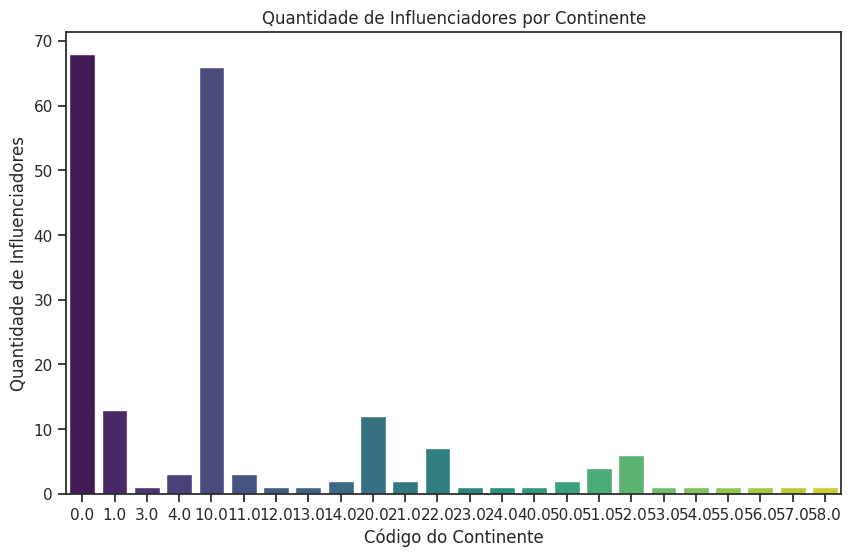

<ipython-input-6-5e8532dfae82>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='magma')


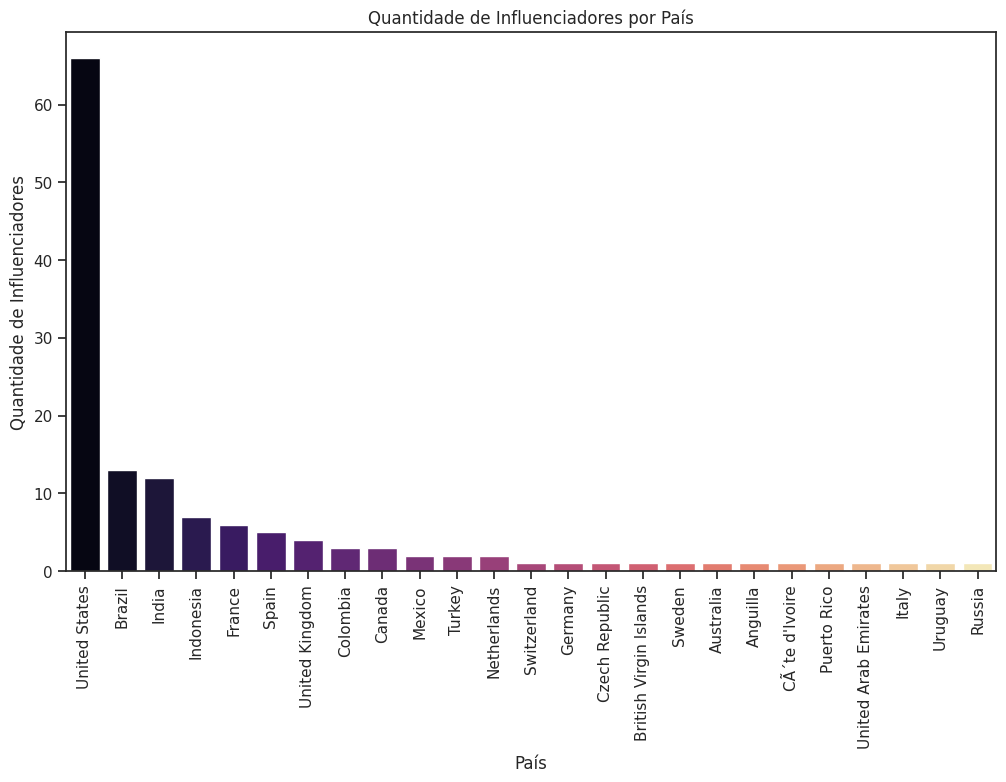

In [6]:
# Visualizações com Seaborn
sns.set_theme(style="ticks")
plt.figure(figsize=(9, 5))
sns.scatterplot(data=df, x='followers', y='avg_likes', hue='continent_code', palette='cool', alpha=0.6)
plt.title('Seguidores vs Curtidas Médias por Continente')
plt.xlabel('Número de Seguidores')
plt.ylabel('Curtidas Médias')
plt.legend(title='Continente', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

plt.figure(figsize=(11, 5))
sns.barplot(x='rank', y='influence_score', data=df.sort_values('rank'), palette='icefire')
plt.title('Pontuação de Influência por Rank')
plt.xlabel('Classificação')
plt.ylabel('Pontuação de Influência')
plt.xticks([])
plt.show()

# Contagem de influenciadores por continente
continent_counts = df['continent_code'].value_counts()

# Gráfico de barras para a quantidade de influenciadores por continente
plt.figure(figsize=(10, 6))
sns.barplot(x=continent_counts.index, y=continent_counts.values, palette='viridis')
plt.title('Quantidade de Influenciadores por Continente')
plt.xlabel('Código do Continente')
plt.ylabel('Quantidade de Influenciadores')
plt.show()

# Contagem de influenciadores por país
country_counts = df['country'].value_counts()

# Gráfico de barras para a quantidade de influenciadores por país
plt.figure(figsize=(12, 7))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='magma')
plt.xticks(rotation=90)  # Rotaciona os nomes dos países para melhor visualização
plt.title('Quantidade de Influenciadores por País')
plt.xlabel('País')
plt.ylabel('Quantidade de Influenciadores')
plt.show()
